In [72]:
import os
os.chdir('/home/tzd/Hg_dataset_practice/Analysis_of_ASGM_Emissions_in_Peru')

In [73]:
%matplotlib inline
import numpy as np

import xarray as xr

#import regionmask 

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy.ma as ma
import csv
#import netCDF4 as nc
import scipy
import pandas
from glob import glob
import pandas as pd
import cartopy.feature as cf
import geopandas as gpd
from shapely.geometry import Point
import geoplot as gplt

import warnings
warnings.filterwarnings('ignore')



np.seterr(invalid='ignore'); # disable a warning from matplotlib and cartopy
from gamap_colormap import WhGrYlRd  # import the "WhGrYlRd" variable from my custom Python script
type(WhGrYlRd)  # our cus

matplotlib.colors.ListedColormap

In [74]:
sf_nm = "/net/fs03/d0/arifein/shapefiles/gadm36_PER_shp/gadm36_PER_0.shp"
peru_sf = gpd.read_file(sf_nm)

In [75]:
cols=['Name','Latitude','Longitude']
data=[['Bariloche',-41.13,-71.42],['Calhau Sao Vincente',16.86402,-24.8673],['Manaus',-2.8906,-59.9698],['Sisal',21.16356,-90.04679],['Chacaltaya',-16.2,-68.12],['Nieuw Nickerie',5.93,-56.98]]# ['Celestún',20.8584,-90.3831],,['Galápagos Islands',-0.95,-90.97]
import pandas as pd
df = pd.DataFrame(data, columns = cols)
 
# print dataframe.
df

,Name,Latitude,Longitude
0,Bariloche,-41.13000,-71.42000
1,Calhau Sao Vincente,16.86402,-24.86730
2,Manaus,-2.89060,-59.96980
3,Sisal,21.16356,-90.04679
4,Chacaltaya,-16.20000,-68.12000
5,Nieuw Nickerie,5.93000,-56.98000


In [76]:
sites=gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df['Longitude'],df['Latitude'] ))
sites

,Name,Latitude,Longitude,geometry
0,Bariloche,-41.13000,-71.42000,POINT (-71.42000 -41.13000)
1,Calhau Sao Vincente,16.86402,-24.86730,POINT (-24.86730 16.86402)
2,Manaus,-2.89060,-59.96980,POINT (-59.96980 -2.89060)
3,Sisal,21.16356,-90.04679,POINT (-90.04679 21.16356)
4,Chacaltaya,-16.20000,-68.12000,POINT (-68.12000 -16.20000)
5,Nieuw Nickerie,5.93000,-56.98000,POINT (-56.98000 5.93000)


In [77]:
Lapan= pd.read_csv('Lapan.csv')
# Creating GeoPandas GeoDataFrame using the Pandas Dataframe 
Lapan_gdf = gpd.GeoDataFrame(Lapan, geometry = gpd.points_from_xy(Lapan['Longitude'],Lapan['Latitude'] ))
Lapan_gdf=Lapan_gdf.sort_values('Latitude') #sort the data from passive samplers by latitude 


LAP=pd.DataFrame()
LAP['LONG']=Lapan_gdf['Longitude']
LAP['LATI']=Lapan_gdf['Latitude']
LAP['OBS']=Lapan_gdf['Measured Conc (ng/m3)']
LAP =LAP.reset_index(drop=True)
LAP =LAP.reset_index(drop=True)
LAP['OBS'].iloc[20]=0.59 # Choose the concentration recorded at 5m at Manaus becasue theese sould be surface concentrations
#The observations are currently recorded as strings. They need to be changed to floating point numbers
observe=[]
for item in LAP['OBS']:
    observe.append(float(item))
observe    
LAP['OBS']=observe

df_Latin = gpd.GeoDataFrame(LAP , geometry = gpd.points_from_xy(LAP['LONG'],LAP['LATI'] ))
L_OB_GEO =df_Latin.drop(columns=['LATI','LONG']) 
#L_OB_GEO

,OBS,geometry
0,0.79,POINT (-70.91570 -54.41440)
1,0.79,POINT (-67.10836 -39.10233)
2,0.95,POINT (-62.44478 -38.69953)
3,1.00,POINT (-52.16148 -32.06891)
4,0.95,POINT (-52.09930 -32.03358)
5,0.63,POINT (-49.81310 -28.59665)
6,0.63,POINT (-54.47865 -25.62674)
7,0.99,POINT (-65.40606 -24.72134)
8,1.22,POINT (-46.76612 -23.45631)
9,0.80,POINT (-44.67889 -22.38583)


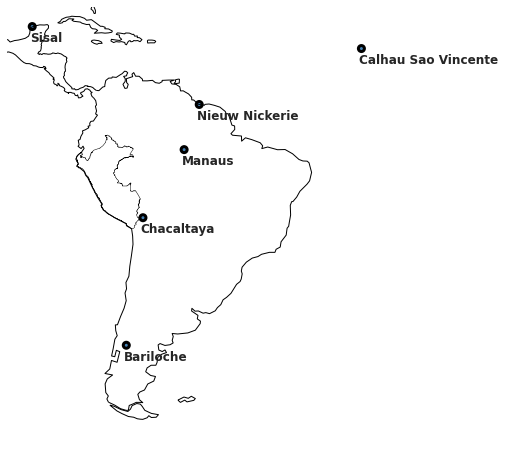

In [96]:
fig, axes = plt.subplots(1, 1, figsize=[10,8], subplot_kw={'projection': ccrs.PlateCarree()})
texts = []
from shapely.geometry import Point
import adjustText as aT
        

gplt.pointplot(sites.geometry,ax=axes, edgecolor='black', linewidth=3,s = 6)
for x, y, label in zip(sites.geometry.x, sites.geometry.y, sites["Name"]):
    texts.append(plt.text(x-0.5, y-3, label, fontsize = 12,fontweight='bold'))
peru_sf.geometry.boundary.plot(ax=axes, edgecolor='k',linewidth = 0.5)
# aT.adjust_text(texts, force_points=0.5, force_text=0.9, expand_points=(1,1), expand_text=(1,1.3), 
            # arrowprops=dict(arrowstyle="-", color='grey', lw=1))
# axes.set_title(f'Mercury Monitoring Stations in Latin America',fontweight='bold')
axes.coastlines()
axes.set_xlim([-95, -20])
axes.set_ylim([-60, 25])
name='GMOS_map'
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/GMOS_Sites/'+name+'.pdf'
fig.savefig(savepath,bbox_inches='tight')
plt.show()